In [20]:
import yfinance as yf

import pandas as pd
import numpy as np

from ipywidgets import interact, interact_manual
import ipywidgets as widgets

from datetime import date, timedelta, datetime
import os
import os.path
import time

import history

pd.set_option("display.max_rows", 500)

In [16]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm
from matplotlib.dates import MonthLocator

%matplotlib inline

# Analysis

In [31]:
%%time

ticker = "0002.HK"
prices = history.get_prices(ticker)
prices.index

CPU times: user 20.8 ms, sys: 0 ns, total: 20.8 ms
Wall time: 18.2 ms


DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03',
               '2020-06-04', '2020-06-05'],
              dtype='datetime64[ns]', name='Date', length=5099, freq=None)

In [23]:
def get_dividends(prices):
    return prices[(prices.Dividends > 0) | (prices["Stock Splits"] > 0)].sort_index(ascending=False).head(10)

get_dividends(prices)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-02,77.400,78.150,77.250,78.100,2941082,0.63,0
2020-03-06,82.034,82.183,81.141,81.935,5620440,1.19,0
2020-03-05,79.799,82.342,79.799,82.342,10261048,1.19,0
2019-12-02,77.772,77.869,76.953,76.953,2207530,0.63,0
2019-09-02,75.540,76.448,74.775,74.966,3032723,0.63,0
2019-05-31,85.054,85.197,83.821,84.106,4174511,0.63,0
2019-03-08,86.532,86.673,85.684,85.684,2803054,1.19,0
2018-12-03,80.681,81.193,79.984,79.984,8074178,0.61,0
2018-09-03,84.174,85.882,84.081,85.605,2648564,0.61,0


2020-06-02 00:00:00
2020-03-06 00:00:00
2020-03-05 00:00:00
2019-12-02 00:00:00
2019-09-02 00:00:00
2019-05-31 00:00:00
2019-03-08 00:00:00
2018-12-03 00:00:00
2018-09-03 00:00:00
2018-06-04 00:00:00


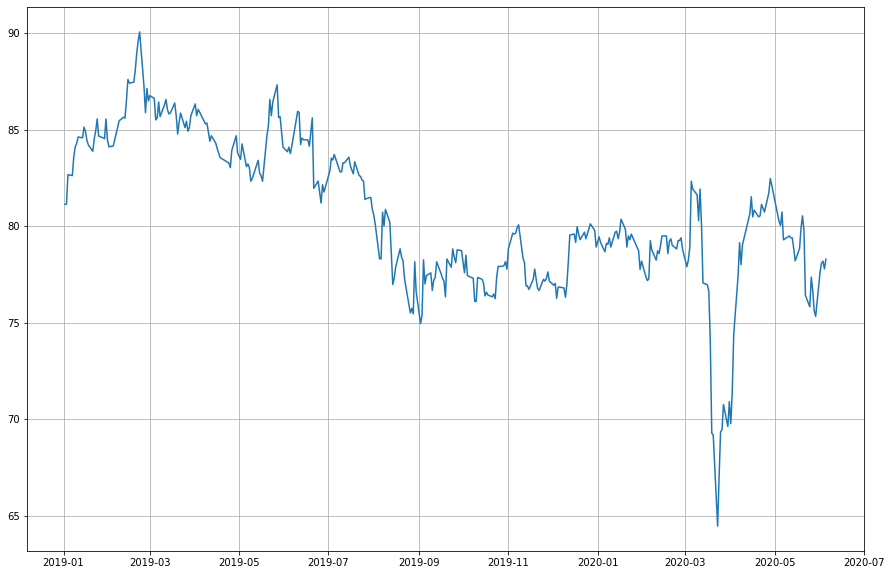

In [39]:
start_date = "20190101"

def plot(prices, start_date):
    start_date = datetime.strptime(start_date, "%Y%m%d")

    _prices = prices[prices.index >= np.datetime64(start_date)]

    close = _prices["Close"]
    close = close[close.index >= np.datetime64(start_date)]

    f, ax = plt.subplots(figsize=(15, 10))
    #close.plot(legend=False, grid=True)
    ax.plot(close)
    ax.grid()
    
    return ax

ax = plot(prices, start_date)

# Dividend Analysis

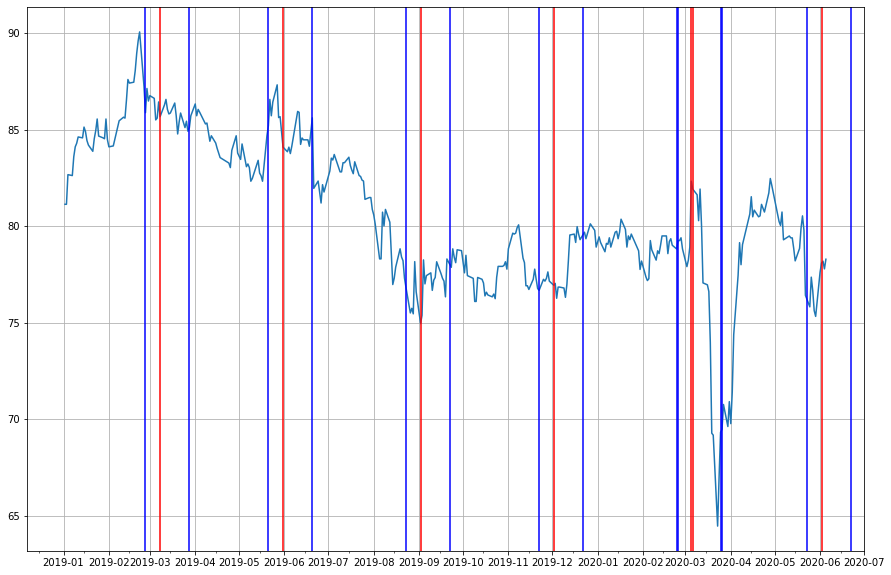

In [48]:
before = 10
after = 20

ax = plot(prices, start_date)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))

div = get_dividends(_prices)
for div_date in div.index:
    plt.axvline(div_date, c="red")
    
    plt.axvline(div_date - timedelta(days=before), c="blue")
    plt.axvline(div_date + timedelta(days=after), c="blue")


In [21]:
prices[prices.index > "20200101"]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,79.025,79.555,78.736,79.459,1479888,0.00,0
2020-01-03,79.651,79.892,79.025,79.170,1686597,0.00,0
2020-01-06,79.025,79.314,78.350,78.688,2012440,0.00,0
2020-01-07,79.073,79.362,78.688,79.121,3529675,0.00,0
2020-01-08,78.495,79.218,78.399,79.073,2233785,0.00,0
2020-01-09,78.640,79.844,78.640,79.411,3377514,0.00,0
2020-01-10,79.796,79.796,78.881,78.929,3411198,0.00,0
2020-01-13,79.796,79.989,79.073,79.700,3682638,0.00,0
2020-01-14,80.085,80.085,79.507,79.748,2948528,0.00,0
